
First, let’s talk objective functions and base learners in XGBoost so we can develop better intuitions about both concepts, as they are critical to understand in order for us to be able to grasp why XGBoost is such a powerful approach to building supervised regression models.

## Objective Functions


An Objective or loss function quantifies how far off our prediction is from the actual result for a given data point. It maps the difference between the prediction and the target to a real number. Our ultimate goal is to find the model that yields the minimum value of the loss function.

Loss functions have specific naming conventions in XGBoost. For regression models, the most common loss function is called reg:linear. On the contrast, for binary classifications models, the most common loss functions used are reg:logistic when you want just decision, not probability and binary:logistic, when you want the actual predicted probability of the positive class.

## Base Learners

XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction. Each of the individual models that are trained and combined are called base learners. 

The goal of XGBoost is to have base learners that is slightly better than random guessing on certain subsets of training examples, and uniformly bad at the remainder, 

so that when all of the predictions are combined the uniformly bad predictions cancel out and those slightly better than chance combine into a single very good prediction. The two base learners for XGBoost are tree and linear.

## Decision Trees As Base Learners

we can build an XGBoost model to predict house prices, in Ames, Iowa, which is a typical regression problem. Our goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so we don’t have to specify that we want to use trees here with booster="gbtree".

In [13]:
# Trees as Base Learners example: Scikit-learn API
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston_data =  boston_dataset = load_boston()
boston_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X, y,
        test_size=0.2, random_state=123)


xg_reg = xgb.XGBRegressor(objective='reg:linear',n_estimators=10, seed=123)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

In [14]:
rmse = np.sqrt(mean_squared_error(y_test,preds))

print("RMSE: %f" % (rmse))

RMSE: 6.077323


It’s now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, but in Ames, Iowa! 

This dataset of housing prices has been pre-loaded into a DataFrame called df. If we explore it in the Shell, we’ll see that there are a variety of features about the house and its location in the city. 

Our goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so we don’t have to specify that you want to use trees here with booster=”gbtree”.

In [16]:
ames_housing = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')
X, y = ames_housing.iloc[:,:-1], ames_housing.iloc[:,-1]

In [17]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


## Linear base learners

Now that we’ve used trees as base models in XGBoost, let’s use the other kind of base model that can be used with XGBoost - a linear learner. 

This model, although not as commonly used in XGBoost, allows us to create a regularized linear regression using XGBoost’s powerful learning API. However, because it’s uncommon, we have to use XGBoost’s own non-scikit-learn compatible functions to build the model, such as xgb.train().


In order to do this you must create the parameter dictionary that describes the kind of booster you want to use. The key-value pair that defines the booster type (base model) you need is “booster”:”gblinear”. Once you’ve created the model, you can use the .train() and .predict() methods of the model just like you’ve done in the past. Here, the data has already been split into training and testing sets, so we can dive right into creating the DMatrix objects required by the XGBoost learning API.

In [18]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label= y_test)


# Create the parameter dictionary: params
params = {"booster":"gblinear","objective":"reg:linear"}


# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)


# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44331.645061


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


## Evaluating model quality

It’s now time to begin evaluating model quality. Here, we will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data.

In [19]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", 
                    as_pandas=True, seed=123)

# Print cv_results
print(cv_results)
# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.488281      429.449371   142980.464844    1193.806011
1    102832.562500      322.503447   104891.398438    1223.161012
2     75872.621094      266.493573    79478.947266    1601.341377
3     57245.657226      273.633063    62411.919922    2220.151162
4     44401.291992      316.426590    51348.276367    2963.378029
4    51348.276367
Name: test-rmse-mean, dtype: float64


## Regularization In XGBoost

Loss function in XGBoost don’t just take into account how close a model’s predictions are to the actual values, but also take into account how complex the model is. This idea of penalizing models as they become more complex is called regularization. So, loss function in XGBoost are used to find models that are both accurate and as simple as they can possibly be. There are several parameters that can be tweaked in XGBoost to limit model complexity by altering the loss function:

- gamma: is a parameter for tree base learners that controls whether a given node on a base learner will split based on the expected reduction in the loss that would occur after performing the split, so that higher values lead to fewer splits. 


- alpha: L1L1 regularization on leaf weights, larger values mean more regularization, which causes many leaf weights in the base learners to go to 0. 


- lambda: L2L2 regularization on leaf weights, is a much stronger penalty that L1L1 and causes leaf weights to smoothly decrease, instead of enforcing strong sparsity constraints on the leaf weights as in L1L1.

## Using regularization in XGBoost

We will now vary the l2 regularization penalty - also known as “lambda” - and see its effect on overall model performance on the Ames housing dataset.

In [20]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)
reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []
# Iterate over reg_params
for reg in reg_params:
    # Update l2 strength
    params["lambda"] = reg
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])
    
    
    
# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.060547
2  100  76624.617188


In [23]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.595704     668.167771  127634.185547   2404.009753
1    89770.031250     456.980559   90122.505860   2107.916842
2    63580.782226     263.442189   64278.558594   1887.552548
3    45633.181641     151.849960   46819.175782   1459.821979
4    33587.097657      87.003217   35670.655274   1140.613227
4    35670.655274
Name: test-mae-mean, dtype: float64


## Visualizing feature importances: What features are most important in my dataset

Another way to visualize our XGBoost models is to examine the importance of each feature column in the original dataset within the model. One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows us to do exactly this, and we’ll get a chance to use it in this exercise!

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

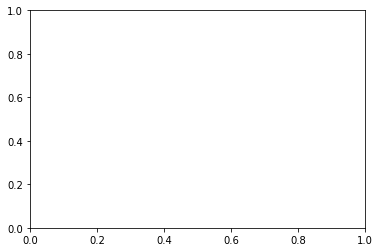

In [25]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


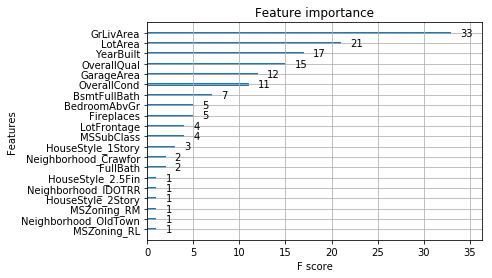

In [22]:
import matplotlib.pyplot as plt

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()